# Курсовая работа
Подготовил студент 2-го курса ПМ21-1 Егоров Санан

##### **Наименование темы**:  
"Машинное обучение в задачах анализа изображений".

#### **Направление работы**:
"Задача распознавания цифр в рукописном тексте (handwritten digit recognition)"

**Цель данной работы работы заключается в качественном сравнении различных моделей машинного и глубокого обучения.**

В данной работе я сравню 5 моделей:
1. Keras CNN (сверточная нейронная сеть для анализа изображений)
2. LogisticRegression (Логистическая регрессия)
3. SVM (Метод опорных векторов с ядром RBF)
4. DecisionTreeClassifier (решающее дерево)
5. K-Nearest Neighbors (метод K ближайших соседей)

Метрики, которые я буду дальше использовать:
1. **F1_macro** - вычисляет среднее гармоническое между точностью (precision) и полнотой (recall) для каждого класса и затем усредняет результаты для всех классов. Эта метрика учитывает не только общую точность модели, но и ее способность точно предсказывать каждый класс.
    
2. **accuracy** - это наиболее базовая метрика, которая показывает, как часто модель правильно предсказывает класс объекта. В случае с MNIST, точность дает представление о том, насколько хорошо модель классифицирует рукописные цифры.

3. **Precision** - это метрика, которая измеряет долю верных положительных результатов относительно всех предсказанных положительных результатов. Эта метрика может быть полезной в случае, когда ложно-положительные результаты не желательны.

4. **Recall** - это метрика, которая измеряет долю верных положительных результатов относительно всех действительных положительных результатов. Эта метрика может быть полезна в случае, когда ложно-отрицательные результаты не желательны.

# Оглавление: <a class="anchor" id="0"></a>

* [1. Установка и импорт необходимых модулей](#1) 

* [2. Предобработка данных](#2)

* [3. Сверточная нейронная сеть keras](#3)

* [4. Логистическая регрессия](#4)

* [5. Метод опорных векторов](#5)

* [6. Решающее дерево](#6)

* [7. Метод K ближайших соседей](#7)

* [8. Улучшение модели](#8)

* [9. Проверка моделей на реальных данных](#9)

* [10. Выводы](#10)

<a id="1"></a>
## <b>1. <span style='color:#43a842'>|</span> Установка и импорт необходимых модулей</b>
* [К разделам](#0)

In [10]:
!pip install keras

In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [229]:
import cv2
import os
import time 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

<a id="2"></a>
## <b>2. <span style='color:#43a842'>|</span> Предобработка данных</b>
* [К разделам](#0)

1. Загружать датасет MNIST буду из модуля keras

Датасет MNIST состоит из двух наборов данных: обучающего и тестового. Обучающий набор данных содержит 60 000 изображений рукописных цифр, а тестовый набор данных содержит 10 000 изображений.

Каждое изображение представляет собой матрицу размером 28x28 пикселей. Каждый пиксель представлен целочисленным значением от 0 до 255, которое указывает на уровень яркости пикселя.

Для каждого изображения в датасете указано правильное значение (от 0 до 9), которое соответствует представленной на изображении рукописной цифре.


In [13]:
# Загрузка данных MNIST и их разделение на обучающую и тестовую выборки соответственно.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2. Нормализация данных 

In [14]:
# Нормализация данных
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

3. Продемонстрирую несколько изображений из датасета

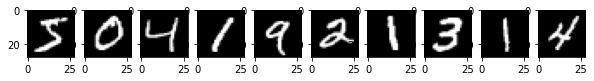

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 5))
for i in range(10):
    axs[i].imshow(x_train[i], cmap=plt.cm.gray)

<a id="3"></a>
## <b>3. <span style='color:#43a842'>|</span> Сверточная нейронная сеть keras</b>
* [К разделам](#0)

In [16]:
# Преобразование меток в формат one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
# Определение архитектуры модели
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Обучение модели
start_1 = time.time()
batch_size = 128
epochs = 10
CNN_keras = model.fit(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train, 
                    batch_size=batch_size, epochs=epochs, verbose=1, 
                    validation_data=(x_test.reshape(x_test.shape[0], 28, 28, 1), y_test))
end_1 = time.time()
duration_keras = end_1  - start_1

Epoch 1/10
469/469 [==============================] - 16s 33ms/step - loss: 0.2955 - accuracy: 0.9094 - val_loss: 0.0606 - val_accuracy: 0.9804
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0993 - accuracy: 0.9698 - val_loss: 0.0422 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0740 - accuracy: 0.9780 - val_loss: 0.0379 - val_accuracy: 0.9870
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0608 - accuracy: 0.9819 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0330 - val_accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0272 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0248 - val_accuracy:

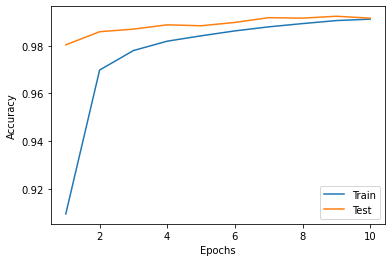

In [20]:
# Построим график learning curve для оценки оптимального количества эпох для данной cnn. 
# Это позволит понять, при каком количестве эпох модель начинает переобучаться, а при каком наоборот - недообучается. 
# Получение значений метрик на каждой эпохе
train_acc = CNN_keras.history['accuracy']
test_acc = CNN_keras.history['val_accuracy']

# Получение количества эпох
epochs_range = range(1, epochs + 1)

# Построение графика
plt.plot(epochs_range, train_acc, label='Train')
plt.plot(epochs_range, test_acc, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Оценка качества модели
score = model.evaluate(x_test.reshape(x_test.shape[0], 28, 28, 1), y_test, verbose=0)
accuracy_keras  = round(score[1],4)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024409964680671692
Test accuracy: 0.991599977016449


In [22]:
# Предсказания модели на тестовых данных
y_pred_1 = model.predict(x_test)
y_pred_1 = np.argmax(y_pred_1, axis=1)

# Реальные метки классов тестовых данных
y_true_1 = np.argmax(y_test, axis=1)

# Расчет f1-score
f1score_keras = f1_score(y_true_1, y_pred_1, average='micro')
f1score_keras =  round(f1score_keras,4)

313/313 [==============================] - 1s 3ms/step


In [23]:
print('f1score_keras - ', round(f1score_keras,4))

f1score_keras -  0.9916


In [24]:
# Расчет метрики precision
precision_keras = precision_score(y_true_1, y_pred_1, average='macro')
# Расчет метрики recall
recall_keras = recall_score(y_true_1, y_pred_1, average='macro')
print('precision_keras - ', round(precision_keras,4))
print('recall_keras - ', round(recall_keras,4))

precision_keras -  0.9915
recall_keras -  0.9915


**Визуализация результатов работы модели с помощью confussion matrix**

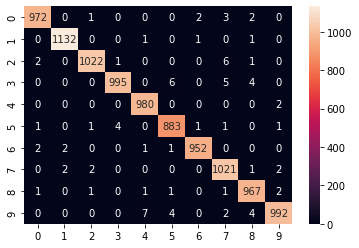

In [25]:
# Создание матрицы ошибок 
cm = confusion_matrix(y_true_1, y_pred_1)

# Создание тепловой карты с матрицей ошибок
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<a id="4"></a>
## <b>4. <span style='color:#43a842'>|</span> Логистическая регрессия</b>
* [К разделам](#0)

In [151]:
# Векторизация данных
x_train_vect = x_train.reshape(60_000, 28*28)
x_test_vect = x_test.reshape(10_000, 28*28)

In [152]:
# Инициализация объекта модели
LogReg = LogisticRegression(multi_class='multinomial', solver='saga')

In [153]:
# Обучение модели логистической регрессии и рассчет времени обучения 
start_2 = time.time()
LogReg.fit(x_train_vect, y_train_1)
end_2 = time.time()
duration_lr = end_2 - start_2 

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [154]:
# Рассчет метрики accuracy 
y_pred_2 = LogReg.predict(x_test_vect)
acc_log_reg = accuracy_score(y_test_1, y_pred_2)
print('accuracy_log_reg - ', round(acc_log_reg,4))

accuracy_log_reg -  0.926


In [155]:
# Рассчет метрики F1_micro 
f1mic_log_reg = f1_score(y_test_1, y_pred_2, average='micro')
print('f1mic_log_reg - ', round(f1mic_log_reg,4))

f1mic_log_reg -  0.926


In [156]:
# Расчет метрики precision
precision_log_reg = precision_score(y_test_1, y_pred_2, average='macro')
# Расчет метрики recall
recall_log_reg = recall_score(y_test_1, y_pred_2, average='macro')
print('precision_log_reg - ', round(precision_log_reg,4))
print('recall_log_reg - ', round(recall_log_reg,4))

precision_log_reg -  0.925
recall_log_reg -  0.9249


Text(0.5, 0.98, 'Classification vector')

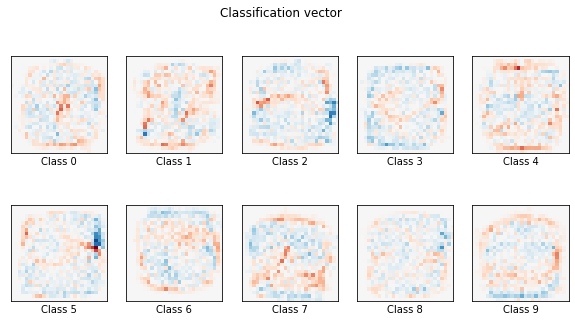

In [157]:
# Выведем веса фичей модели, чтобы увидеть наиболее важные паттерны пикселей в изображении
coef = LogReg.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector")
# Для каждого класса график показывает, какие пиксели на изображении наиболее важны для того,
# чтобы отнести это изображение к данному классу. Более красные (с большими положительными весами) 
# и более синие (с большими отрицательными весами) пиксели указывают на более важные признаки, 
# которые помогают модели классифицировать изображения.

**Визуализация результатов работы модели с помощью confussion matrix**

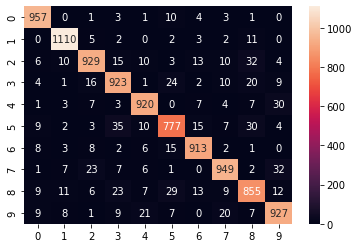

In [158]:
# Создание матрицы ошибок 
cm = confusion_matrix(y_test_1, y_pred_2)

# Создание тепловой карты с матрицей ошибок
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<a id="5"></a>
## <b>5. <span style='color:#43a842'>|</span> Метод опорных векторов</b>
* [К разделам](#0)

In [159]:
# Инициализация объекта модели
svm_rbf = SVC(kernel='rbf')

In [160]:
# Обучение модели SVM и рассчет времени обучения 
start_3 = time.time()
svm_rbf.fit(x_train_vect, y_train_1)
end_3 = time.time()
duration_svm = end_3 - start_3

In [161]:
# Рассчет метрики accuracy 
y_pred_3 = svm_rbf.predict(x_test_vect)
acc_SVC = accuracy_score(y_test_1, y_pred_3)
print('accuracy_SVM - ', round(acc_SVC,4))

accuracy_SVM -  0.9792


In [162]:
# Рассчет метрики F1_micro 
f1mic_SVC = f1_score(y_test_1, y_pred_3, average='micro')

print('F1_micro_SVM - ', round(f1mic_SVC,4))

F1_micro_SVM -  0.9792


In [163]:
# Расчет метрики precision
precision_SVM = precision_score(y_test_1, y_pred_3, average='macro')
# Расчет метрики recall
recall_SVM = recall_score(y_test_1, y_pred_3, average='macro')
print('precision_SVM - ', round(precision_SVM,4))
print('recall_SVM - ', round(recall_SVM,4))

precision_SVM -  0.9792
recall_SVM -  0.9791


**Визуализация результатов работы модели с помощью confussion matrix**

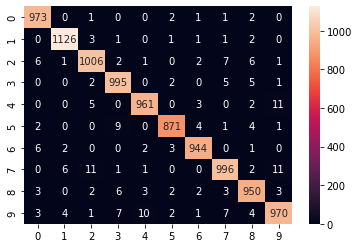

In [164]:
# Создание матрицы ошибок 
cm = confusion_matrix(y_test_1, y_pred_3)

# Создание тепловой карты с матрицей ошибок
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<a id="6"></a>
## <b>6. <span style='color:#43a842'>|</span> Решающее дерево</b>
* [К разделам](#0)

In [165]:
# Инициализация объекта модели
dec_tree = DecisionTreeClassifier()

In [166]:
# Обучение модели DecisionTreeClassifier()
start_4 = time.time()
dec_tree.fit(x_train_vect, y_train_1)
end_4 = time.time()
duration_dt = end_4 - start_4 

In [167]:
# Рассчет метрики accuracy 
y_pred_4 = dec_tree.predict(x_test_vect)
acc_dT = accuracy_score(y_test_1, y_pred_4)

In [168]:
print('accuracy_decision_tree - ', round(acc_dT,4))

accuracy_decision_tree -  0.8763


In [169]:
# Рассчет метрики F1_micro 
f1mic_dT = f1_score(y_test_1, y_pred_4, average='micro')
print('F1_micro_decision_tree - ', round(f1mic_dT,4))

F1_micro_decision_tree -  0.8763


In [170]:
# Расчет метрики precision
precision_dT = precision_score(y_test_1, y_pred_4, average='macro')
# Расчет метрики recall
recall_dT = recall_score(y_test_1, y_pred_4, average='macro')
print('precision_decTree - ', round(precision_dT,4))
print('recall_decTree - ', round(recall_dT,4))

precision_decTree -  0.875
recall_decTree -  0.8748


In [171]:
# Далее с помощью кросс валидации оценим значение метрики accuracy 
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x_train_vect, y_train_1, cv=5, scoring='accuracy')

In [172]:
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.87


**Визуализация результатов работы модели с помощью confussion matrix**

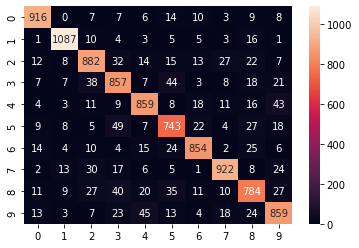

In [173]:
# Создание матрицы ошибок 
cm = confusion_matrix(y_test_1, y_pred_4)

# Создание тепловой карты с матрицей ошибок
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<a id="7"></a>
## <b>7. <span style='color:#43a842'>|</span> Метод K ближайших соседей</b>
* [К разделам](#0)

In [174]:
# Инициализация объекта модели
KNN = KNeighborsClassifier()

In [175]:
# Обучение модели K-Nearest Neighbors
start_5 = time.time()
KNN.fit(x_train_vect, y_train_1)
end_5 = time.time()
duration_knn = end_5 - start_5

In [176]:
# Рассчет метрики accuracy 
y_pred_5 = KNN.predict(x_test_vect)
acc_KNN = accuracy_score(y_test_1, y_pred_5)

In [177]:
print('accuracy_KNN - ', round(acc_KNN,4))

accuracy_KNN -  0.9688


In [178]:
# Рассчет метрики F1_micro 
f1mic_KNN = f1_score(y_test_1, y_pred_5, average='micro')
print('F1_micro_KNN - ', round(f1mic_KNN,4))

F1_micro_KNN -  0.9688


In [179]:
# Расчет метрики precision
precision_KNN = precision_score(y_test_1, y_pred_5, average='macro')
# Расчет метрики recall
recall_KNN = recall_score(y_test_1, y_pred_5, average='macro')
print('precision_KNN - ', round(precision_KNN,4))
print('recall_KNN - ', round(recall_KNN,4))

precision_KNN -  0.9693
recall_KNN -  0.9685


**Визуализация результатов работы модели с помощью confussion matrix**

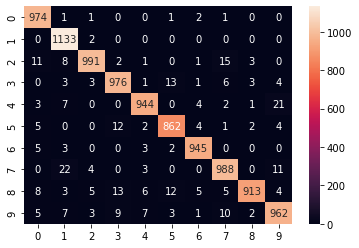

In [180]:
# Создание матрицы ошибок 
cm = confusion_matrix(y_test_1, y_pred_5)

# Создание тепловой карты с матрицей ошибок
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

<a id="8"></a>
## <b>8. <span style='color:#43a842'>|</span> Улучшение моделей</b>
* [К разделам](#0)

Теперь попробую улучшить результат моделей, где он оказался не таким высоким:
**Decision Tree Classifier** 


In [181]:
# Для начала, попробуем улучшить модель решающего дерева с помощью метода Random Search. 
# Random Search - это метод оптимизации гиперпараметров для моделей машинного обучения. 
# В отличие от Grid Search, где перебираются все возможные комбинации гиперпараметров,
# в Random Search гиперпараметры выбираются случайным образом из заданного распределения.

In [182]:
import numpy as np

In [183]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Инициализация модели
dtc = DecisionTreeClassifier()

# Пространство гиперпараметров
param_dist = {
    "max_depth": [3, None],
    "max_features": [1, None],
    "min_samples_split": np.random.randint(2, 20, size=2),
    "min_samples_leaf": np.random.randint(1, 20, size=2),
    "criterion": ["gini", 'entropy']
}

# Определение случайного поиска с помощью RandomizedSearchCV
random_search = RandomizedSearchCV(
    dtc, 
    param_distributions=param_dist, 
    cv=2, 
    n_iter=10, 
    random_state=42
)

# Обучение модели на данных
random_search.fit(x_train_vect, y_train_1)

# Обновление значения текущего скора
current_score = random_search.score(x_test_vect, y_test_1)

# Вывод наилучших гиперпараметров и значения метрики на кросс-валидации
print("Лучшие гиперпараметры:", random_search.best_params_)
print("Лучший score:", current_score)


Лучшие гиперпараметры: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}
Лучший score: 0.8877


In [184]:
# Как мы видим, Random Search дал результат и прирост составил 0.0119, что можно считать погрешностью.

<a id="9"></a>
## <b>9. <span style='color:#43a842'>|</span> Проверка моделей на реальных данных</b>
* [К разделам](#0)

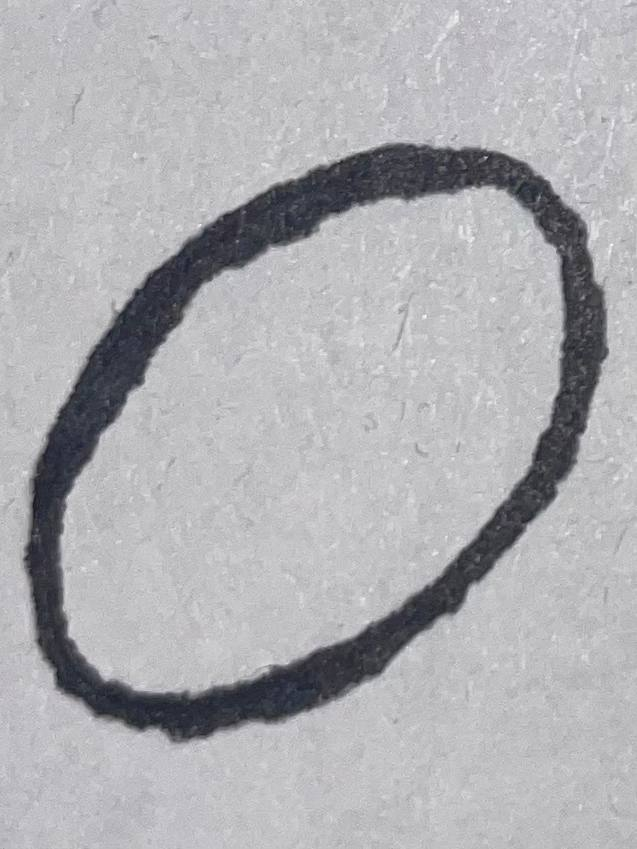

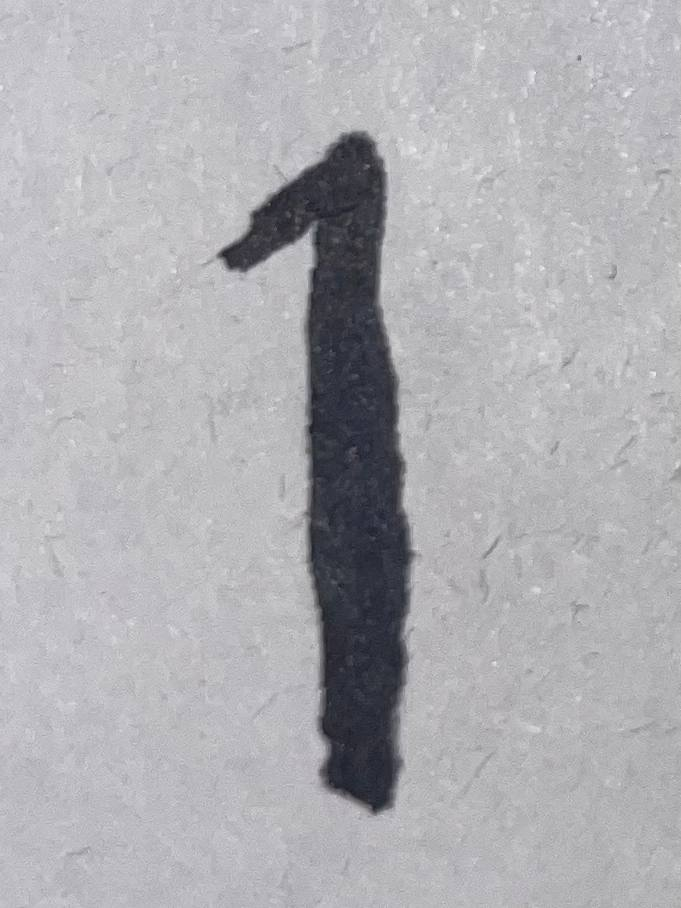

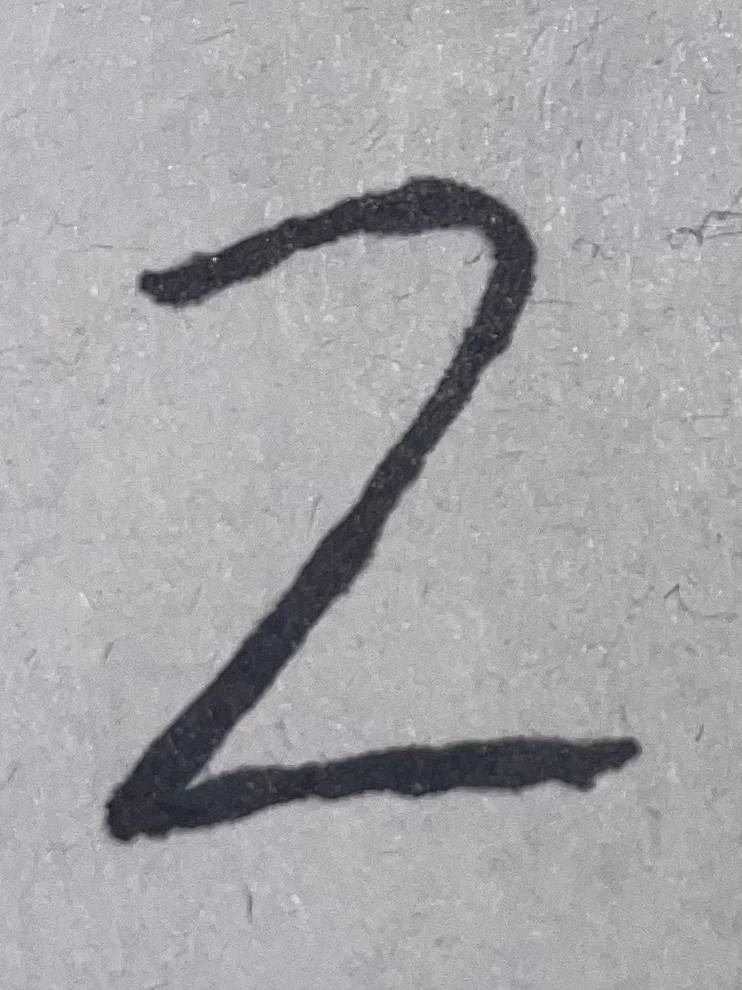

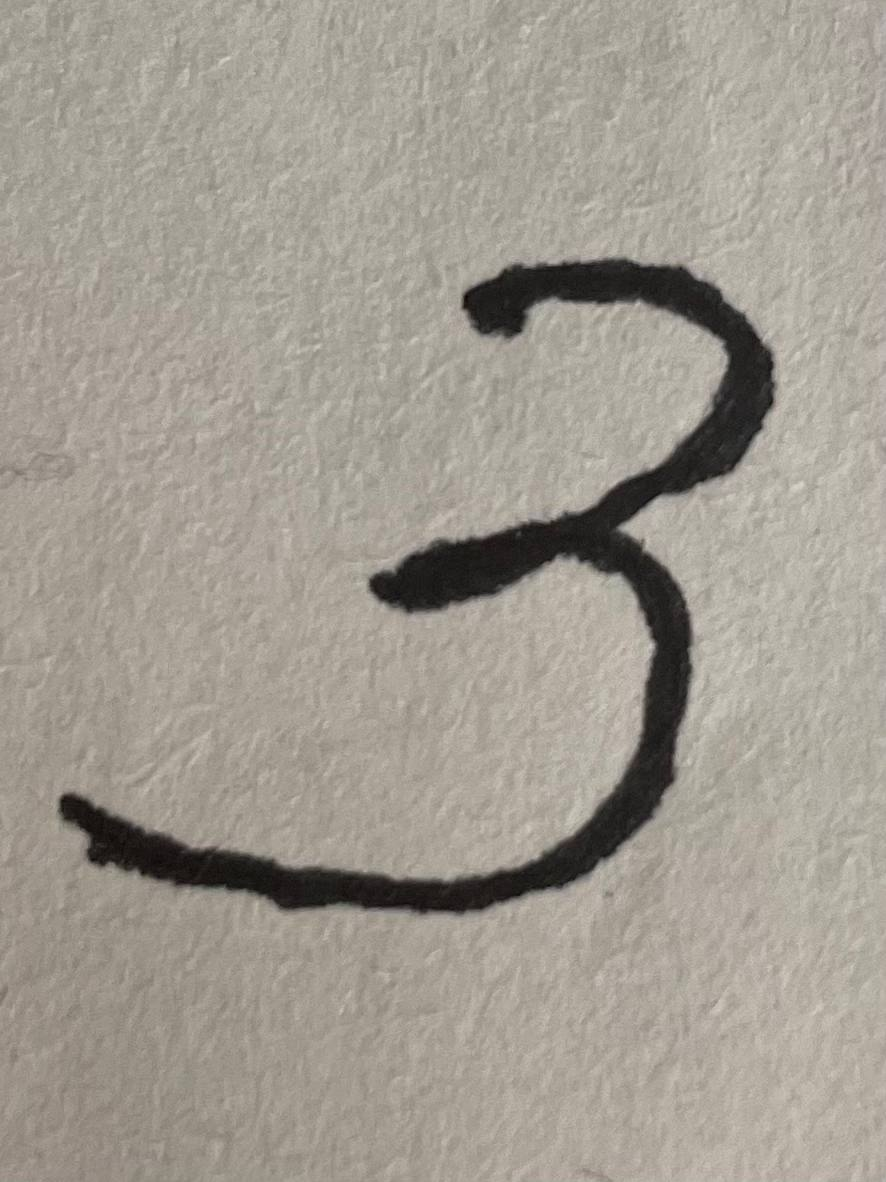

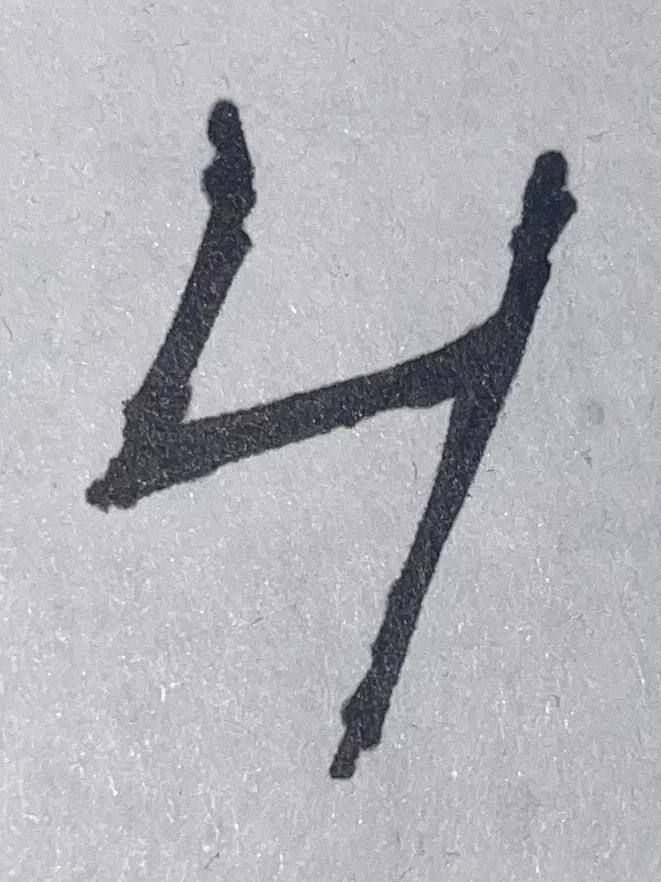

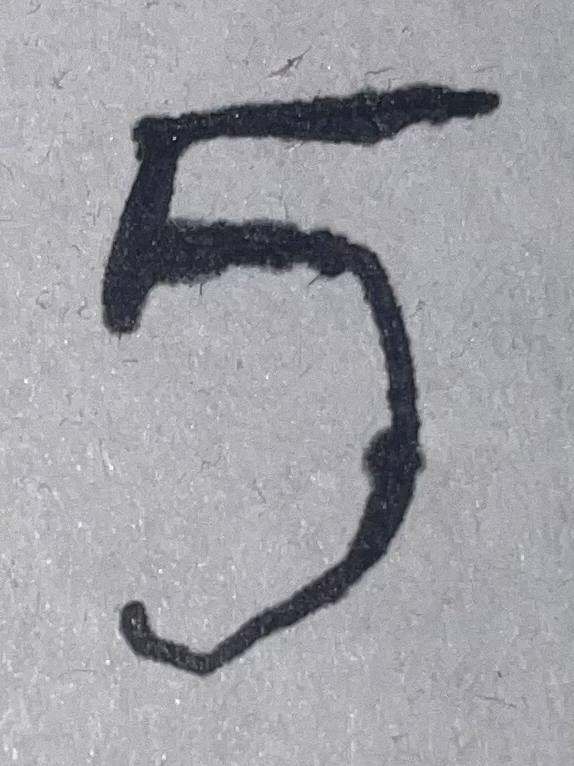

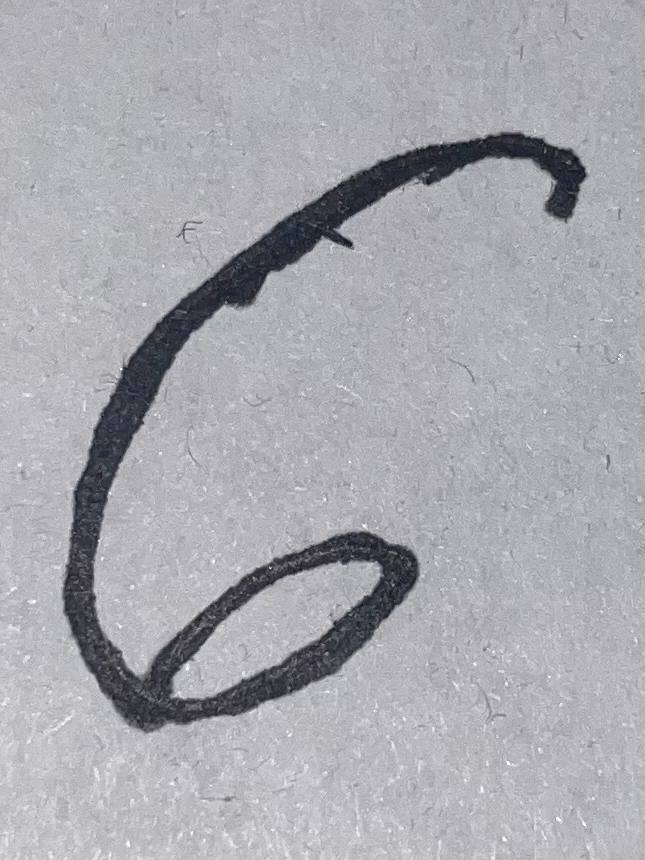

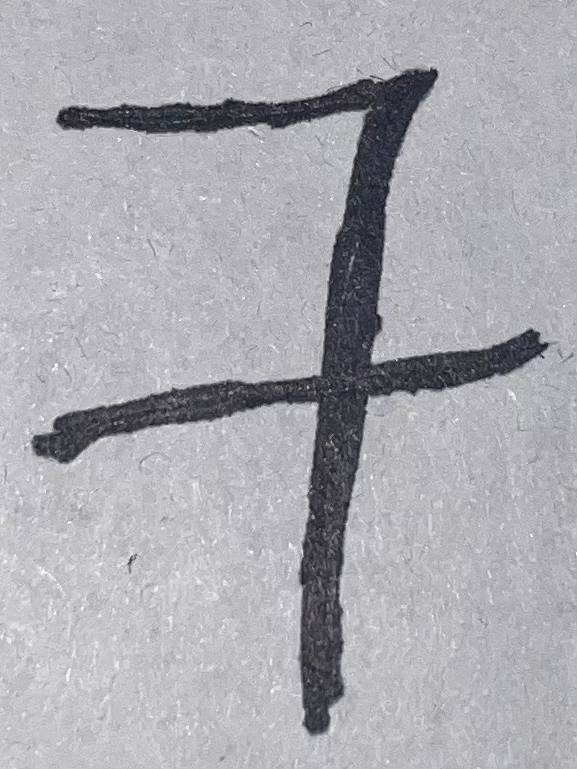

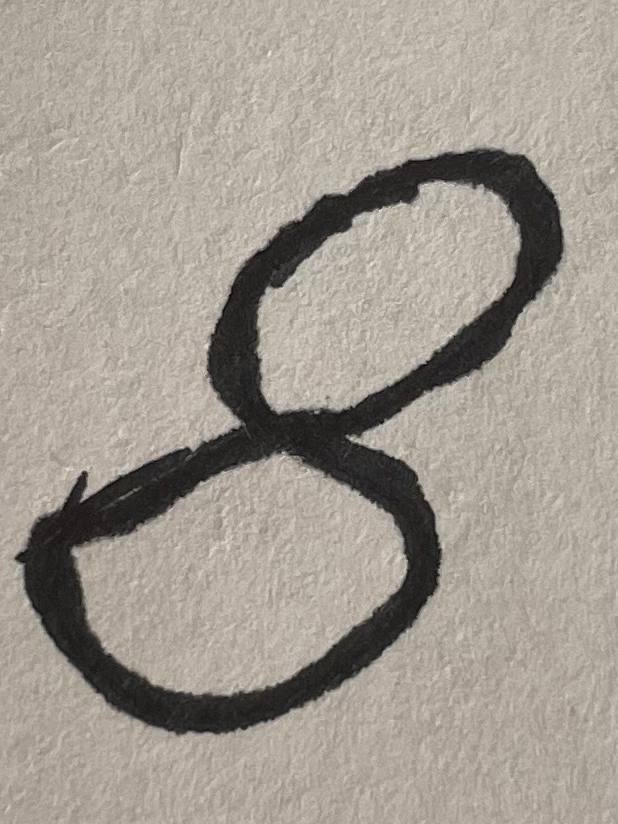

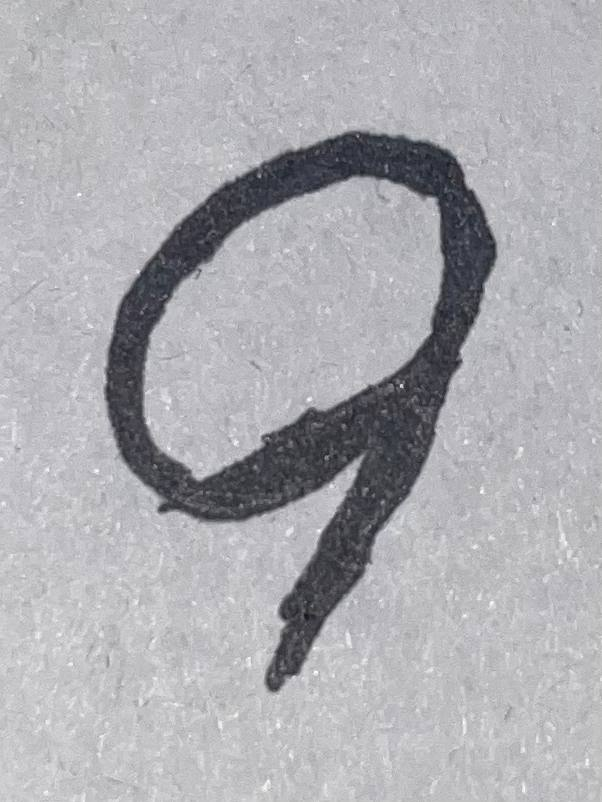

In [228]:
# Для начала выведу исходные фото, сделанные мною
folder_path = "D:/Users10/Dez/Desktop/Курсовая_тест/"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Проверяем расширение файла
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # Полный путь к файлу
            file_path = os.path.join(root, file)
            # Отображаем изображение
            display(Image(filename=file_path))


In [230]:
# Подготовка данных: загрузим реальные фото цифр, сделанные мною 
folder_path = 'D:/Users10/Dez/Desktop/Курсовая_ТЕСТ/'
file_names = os.listdir(folder_path)
s = []
for file_name in file_names:
    image = cv2.imread(file_name)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    out = 255 - resized
    s.append(out)

s = np.array(s)    

### Keras CNN

In [205]:
# Нормализуем данные 
s = s.astype('float32') / 255

In [187]:
# Предсказания модели на тестовых данных
y_pred_keras = model.predict(s)
y_pred_keras = np.argmax(y_pred_keras, axis=1)
y_true_real = np.array([0,1,2,3,4,5,6,7,8,9])

1/1 [==============================] - 0s 20ms/step


In [188]:
y_pred_keras # выведем предсказанные моделью цифры 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [189]:
# посчитаем метрику f1 micro
f1score_keras_real = f1_score(y_true_real, y_pred_keras, average='micro')
f1score_keras_real =  round(f1score_keras_real,4)

In [190]:
print('Метрика f1 (Keras CNN) для реальных данных: ', f1score_keras_real)

Метрика f1 (Keras CNN) для реальных данных:  1.0


In [219]:
accuracy_keras_real = accuracy_score(y_true_real, y_pred_keras)

### Логистическая регрессия

In [191]:
# Векторизация данных
x_real_vect = s.reshape(10, 28*28)

In [214]:
# Рассчет метрики accuracy 
y_pred_real_lr = LogReg.predict(x_real_vect)
acc_log_reg_real = accuracy_score(y_true_real, y_pred_real_lr)
print('accuracy_log_reg_real - ', round(acc_log_reg_real,4))

accuracy_log_reg_real -  0.7


In [216]:
f1_score(y_true_real, y_pred_real_lr, average='micro')

0.7

### Метод опорных векторов

In [206]:
# Рассчет метрики accuracy 
y_pred_SVM_real = svm_rbf.predict(x_real_vect)
acc_SVC_real = accuracy_score(y_true_real, y_pred_SVM_real)
print('accuracy_SVM на реальных данных - ', round(acc_SVC_real,4))

accuracy_SVM на реальных данных -  0.7


In [212]:
print('f1-score SVM на реальных данных: ', f1_score(y_true_real, y_pred_SVM_real, average='micro'))

f1-score SVM на реальных данных:  0.7


### Решающее дерево

In [198]:
y_pred_DT_real = dec_tree.predict(x_real_vect)
acc_dT_real = accuracy_score(y_true_real, y_pred_DT_real)

In [199]:
acc_dT_real

0.8

### К ближайших соседей 

In [220]:
# Рассчет метрики accuracy 
y_pred_real_KNN = KNN.predict(x_real_vect)
acc_KNN_real = accuracy_score(y_true_real, y_pred_real_KNN)

In [221]:
acc_KNN_real

0.8

In [222]:
f1_score(y_true_real, y_pred_real_KNN, average='micro')

0.8000000000000002

### Вывод по тесту на реальных данных

In [226]:
models = ['Keras CNN','LogisticRegression', 'SVM', 'DecisionTreeClassifier', 'K-Nearest Neighbors']
accuracy_array_real = [accuracy_keras_real, acc_log_reg_real, acc_SVC_real, acc_dT_real, acc_dT_real]
results_real = pd.DataFrame(data=accuracy_array_real, index=models, columns=['Accuracy'])

In [227]:
results_real

,Accuracy
Keras CNN,1.0
LogisticRegression,0.7
SVM,0.7
DecisionTreeClassifier,0.8
K-Nearest Neighbors,0.8


<a id="10"></a>
## <b>10. <span style='color:#43a842'>|</span> Выводы</b>
* [К разделам](#0)

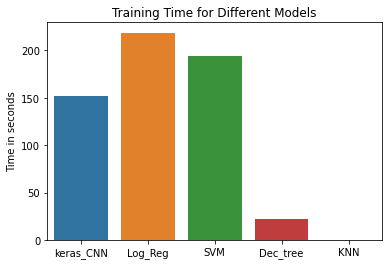

In [200]:
times = pd.DataFrame({'time': [151.574488, 218.596815, 194.450191, 22.541256, 0.004983]}, 
                     index=['keras_CNN', 'Log_Reg', 'SVM', 'Dec_tree', 'KNN'])

sns.barplot(x=times.index, y='time', data=times,)
plt.ylabel('Time in seconds')
plt.title('Training Time for Different Models')
plt.show()

In [201]:
# Модель, обученная с помощью алгоритма k ближайших соседей (KNN), обучается быстрее всех - всего 0.00498 секунды. Так как в этой 
# модели нет как такого обучения, то время затраченное на обучение получилось минимальным
# Модель дерева решений (Dec_tree) обучается также довольно быстро - 22.54 секунды.
# Модель сверточной нейронной сети, обученной с помощью Keras (keras_CNN) - 151.57 секунды. Однако данный результат 
# является временем обучения 10 эпох, на 1 эпоху в среднем затрачивалось 15 секунд, что является хорошим результатом. 
# Самой медленной является модель опорных векторов (SVM) и модель логистической регрессии (Log_Reg) - 194.45 и 218.60 секунд соответственно.

### Вывод результатов 

In [202]:
# Создание списков для формарования DataFrame
models = ['Keras CNN','LogisticRegression', 'SVM', 'DecisionTreeClassifier', 'K-Nearest Neighbors']
accuracy_array = [accuracy_keras, acc_log_reg, acc_SVC, acc_dT, acc_KNN]
f1_micro_array = [f1score_keras, f1mic_log_reg, f1mic_SVC, f1mic_dT, f1mic_KNN]
precision_array = [precision_keras, precision_log_reg, precision_SVM, precision_dT, precision_KNN]
recall_array = [recall_keras, recall_log_reg, recall_SVM, recall_dT, recall_KNN]

In [203]:
# Формируем таблицу на основе списков с результатами метрик.
results = pd.DataFrame(data=list(zip(accuracy_array, f1_micro_array, precision_array, recall_array)), index=models, columns=['Accuracy', 'F1_micro', 'Precision', 'Recall'])

In [204]:
results = results.round(4)
results

,Accuracy,F1_micro,Precision,Recall
Keras CNN,0.9916,0.9916,0.9915,0.9915
LogisticRegression,0.9260,0.9260,0.9250,0.9249
SVM,0.9792,0.9792,0.9792,0.9791
DecisionTreeClassifier,0.8763,0.8763,0.8750,0.8748
K-Nearest Neighbors,0.8000,0.9688,0.9693,0.9685


### Вывод работы 

Из предоставленных метрик следует, что Keras CNN показал наилучшие результаты по всем четырем метрикам, что может говорить о том, что нейронные сети могут быть более эффективными, чем классические алгоритмы машинного обучения, для данной задачи классификации цифр на датасете MNIST.

Модель SVM также показала хорошие результаты, близкие к Keras CNN, что говорит о том, что SVM может быть полезным выбором.

Logistic Regression, Decision Tree и K-Nearest Neighbors также показали средние результаты, но не достигли такой же точности, как Keras CNN и SVM.

Время, которое было затрачено на обучение моделей не является существенным, ввиду размера датасета и мощности GPU, на котором происходило обучение всех представленным в работе моделей.( не более 3-х минут)

Проверив модели на реальных данных можно с уверенностью сказать, что в задачах анализа изображений сверточные нейронные сети существенно превосходят классические модели машинного обучения.
Вот несколько причин, почему CNN превосходят классические модели в задачах анализа изображений:

1. Специализация на изображениях: Сверточные нейронные сети изначально были разработаны для работы с изображениями. Их работа построена на внутренних слоях, которые способны выполнять свертку признаков из изображений, таких как границы, текстуры и формы.

2. Иерархическое обучение: CNN обычно имеют несколько слоев, которые обучаются на разных уровнях абстракции. Первые слои обычно обнаруживают простые функции, такие как границы или углы, а последующие слои комбинируют эти функции для обнаружения более сложных объектов и признаков. Такая иерархическая структура позволяет CNN лучше представлять информацию из изображений.

В целом, можно сделать вывод, что использование нейронных сетей, таких как Keras CNN, может привести к лучшим результатам, чем классические алгоритмы машинного обучения, но необходимо учитывать ограничения на время и вычислительную мощность при работе с большими объемами данных.